# Data Cleaning

Function to abstract data cleaning steps

In [2]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [1]:
def clean_dataframe(filename, column_mapping, skiprow=0):
    """ 
    This function cleans the dataframe with the following steps:
    1. Reads df from csv file
    2. Renames column
    3. Changes "month" column to a datetime datatype
    4. Filters data to only show years 2012 to 2022 to match the dengue dataset

    Input: filename, old_column_name, new_column_name
    Returns: cleaned dataframe, shape of df and boolean value if dataframe contains any missing values
    """
    df = pd.read_csv(filename, skiprows=skiprow)
    df.rename(columns=column_mapping, inplace=True)
    df['month'] = pd.to_datetime(df['month'])
    df = df[(df['month'].dt.year >= 2012) & (df['month'].dt.year <= 2022)]
    shape = df.shape
    missing_values = df.isnull().values.any()

    return df, shape, missing_values


# Exploratory Data Analysis

## Weather Conditions
This section covers the weather conditions analysis and the impact to dengue cases across Singapore. Data from weather.gov.sg shows a daily weather condition across different area of Singapore(e.g. Kallang, Woodlands, etc.). As our dengue data is not segregated into different area but rather the total cases across Singapore, we are not using the data from weather.gov.sg. Instead, weather conditions data from data.gov.sg is used as it represents the weather conditions of Singapore as a whole.

### Surface Air Temperature
Data obtained from data.gov.sg which describes the monthly mean of the daily temperature across Singapore. The temperature data comprises of minimum, maximum, and mean temperature.

In [3]:
max_temp_col_map = {'temp_mean_daily_max': 'max_temp'}
min_temp_col_map = {'temp_mean_daily_min': 'min_temp'}
mean_temp_col_map = {'temp_mean_daily': 'mean_temp'}

max_temp, max_temp_shape, max_temp_missing_values = clean_dataframe('assets/max_temperature_raw_data.csv', max_temp_col_map)
min_temp, min_temp_shape, min_temp_missing_values = clean_dataframe('assets/min_temperature_raw_data.csv', min_temp_col_map)
mean_temp, mean_temp_shape, mean_temp_missing_values = clean_dataframe('assets/mean_temperature_raw_data.csv', mean_temp_col_map)

In [4]:
print(max_temp.head(2))
print(max_temp.tail(2))
print(f"Max Temp: {max_temp_shape}, Missing Values: {max_temp_missing_values}")

         month  max_temp
360 2012-01-01      30.6
361 2012-02-01      31.1
         month  max_temp
490 2022-11-01      31.4
491 2022-12-01      30.3
Max Temp: (132, 2), Missing Values: False


In [5]:
print(min_temp.head(2))
print(min_temp.tail(2))
print(f"Max Temp: {min_temp_shape}, Missing Values: {min_temp_missing_values}")

         month  min_temp
360 2012-01-01      24.3
361 2012-02-01      24.8
         month  min_temp
490 2022-11-01      24.4
491 2022-12-01      24.5
Max Temp: (132, 2), Missing Values: False


In [6]:
print(mean_temp.head(2))
print(mean_temp.tail(2))
print(f"Max Temp: {mean_temp_shape}, Missing Values: {mean_temp_missing_values}")

         month  mean_temp
360 2012-01-01       26.7
361 2012-02-01       27.2
         month  mean_temp
490 2022-11-01       27.4
491 2022-12-01       26.8
Max Temp: (132, 2), Missing Values: False


In [7]:
# Merge the 3 datasets
temp_1 = pd.merge(max_temp, min_temp, 'inner')
temp = pd.merge(temp_1, mean_temp, 'inner')
print(temp.head(2))
print(temp.dtypes)
print(temp.shape)


       month  max_temp  min_temp  mean_temp
0 2012-01-01      30.6      24.3       26.7
1 2012-02-01      31.1      24.8       27.2
month        datetime64[ns]
max_temp            float64
min_temp            float64
mean_temp           float64
dtype: object
(132, 4)


Plot the max, min and mean temperature to evaluate the distribution of the trend across time

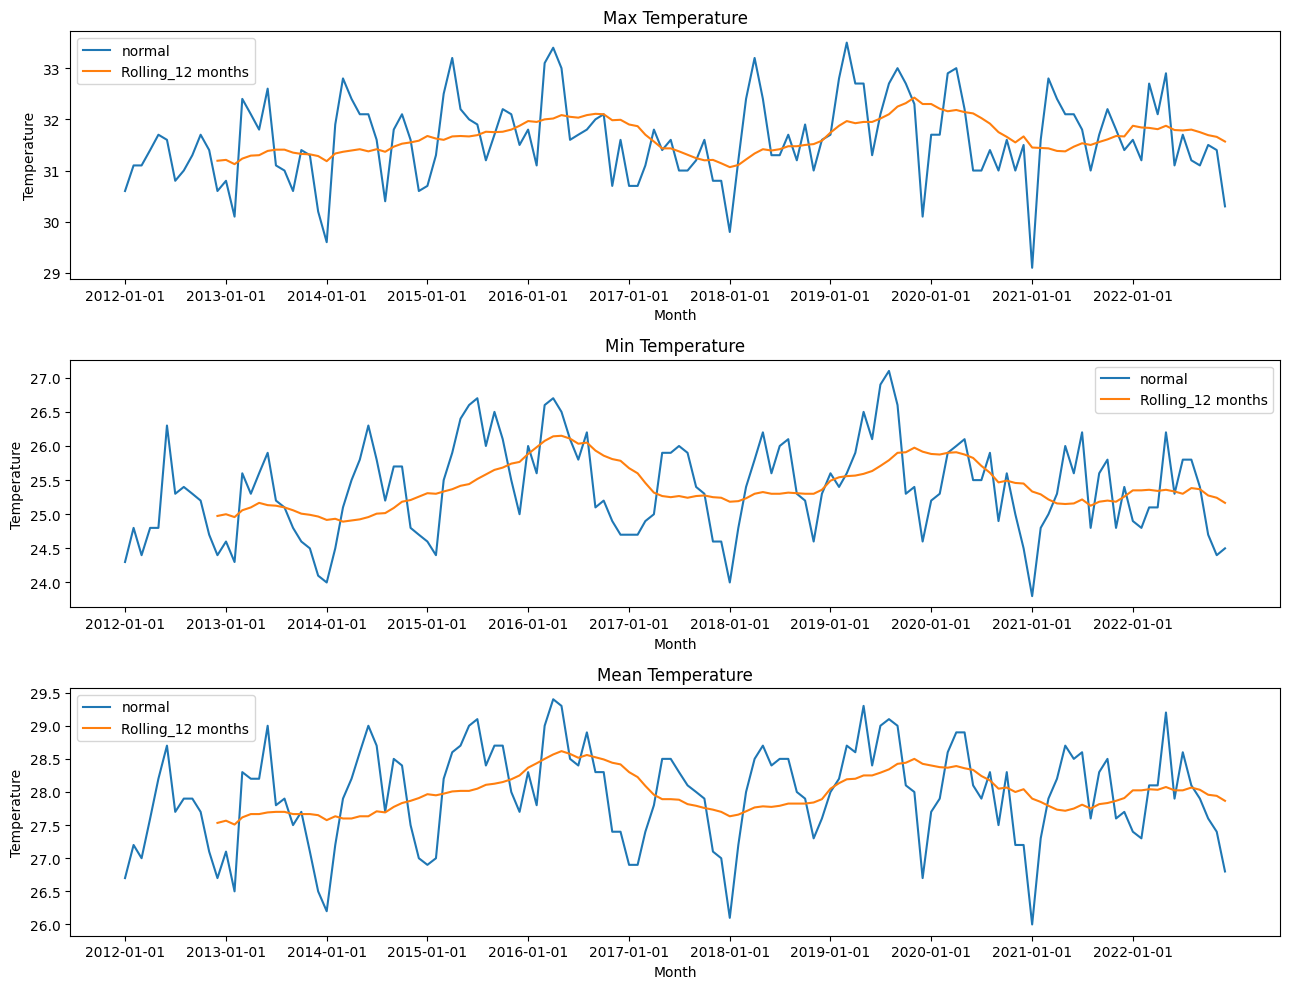

In [8]:
fig, axes = plt.subplots(nrows=3, figsize=(13, 10))
windows = [0, 12]
plots = ['max_temp', 'min_temp', 'mean_temp']
titles = ['Max Temperature', 'Min Temperature', 'Mean Temperature']

for index, plot in enumerate(plots):
    for window in windows:
        if window == 0:
            axes[index].plot(temp['month'], temp[plot], label='normal')
        else:
            axes[index].plot(temp['month'], temp[plot].rolling(window).mean(), label=f'Rolling_{window} months')
        
        axes[index].set_title(titles[index])
        axes[index].set_xlabel('Month')
        axes[index].set_ylabel('Temperature')
        axes[index].legend()
        axes[index].set_xticks(temp['month'][::12])

plt.tight_layout()

Looking at the 1 year moving average of the temperature, we could observe the followings:
- Temperature was in increasing trend from 2013 to 2016, before tapering down in 2017 and 2018
- The temperature gradually increased from 2018 to 2022, before gradually decreased until 2022

### Rainfall
Data obtained from data.gov.sg which consists of the monthly total rainfall and monthly number of rain days

In [9]:
rain_days_map = {'no_of_rainy_days': 'rainy_days'}
rainfall_map = {'total_rainfall': 'rainfall'}   

rain_days, rain_days_shape, rain_days_missing_values = clean_dataframe('assets/rain_days_raw_data.csv', rain_days_map)
rainfall, rainfall_shape, rainfall_missing_values = clean_dataframe('assets/rainfall_raw_data.csv', rainfall_map)

In [10]:
print(f'rain days df shape: {rain_days_shape}, missing values: {rain_days_missing_values}')
print(f'rainfall df shape: {rainfall_shape}, missing values: {rainfall_missing_values}')

rain days df shape: (132, 2), missing values: False
rainfall df shape: (132, 2), missing values: False


In [11]:
# Merge the 2 rain datasets
rain = pd.merge(rain_days, rainfall, 'inner')
print(rain.head())

       month  rainy_days  rainfall
0 2012-01-01          16     106.1
1 2012-02-01          11      83.6
2 2012-03-01          21     313.4
3 2012-04-01          20     260.6
4 2012-05-01          19     292.0


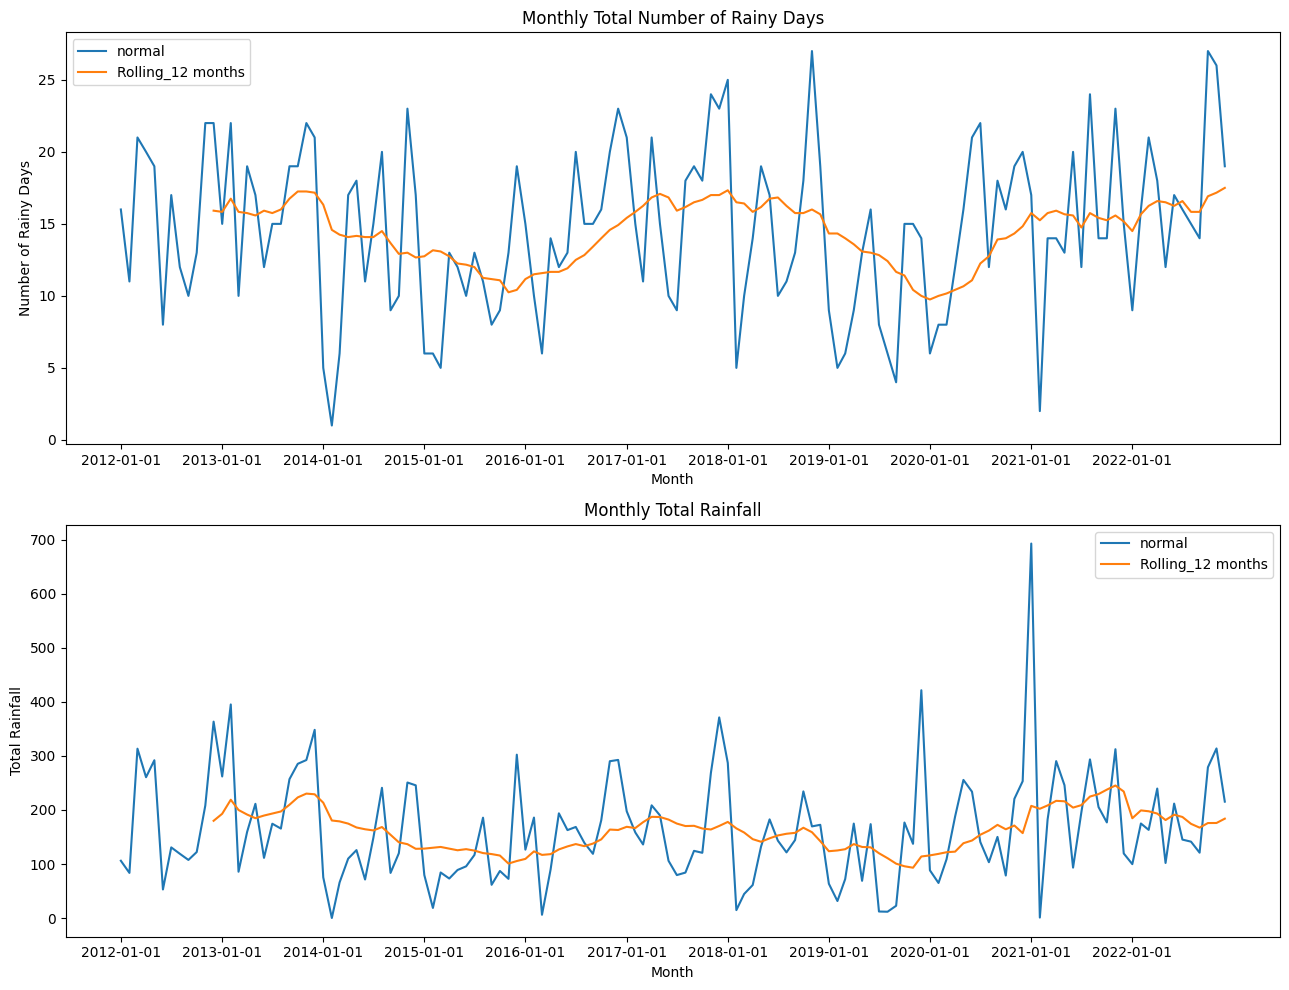

In [12]:
fig, axes = plt.subplots(nrows=2, figsize=(13, 10))
windows = [0, 12]
plots = ['rainy_days', 'rainfall']
titles = ['Monthly Total Number of Rainy Days', 'Monthly Total Rainfall']
y_labels = ['Number of Rainy Days', 'Total Rainfall']

for index, plot in enumerate(plots):
    for window in windows:
        if window == 0:
            axes[index].plot(rain['month'], rain[plot], label='normal')
        else:
            axes[index].plot(rain['month'], rain[plot].rolling(window).mean(), label=f'Rolling_{window} months')
        
        axes[index].set_title(titles[index])
        axes[index].set_xlabel('Month')
        axes[index].set_ylabel(y_labels[index])
        axes[index].legend()
        axes[index].set_xticks(temp['month'][::12])
plt.tight_layout()

Looking at the 1 year moving average of the rainfall data, we could observe the followings:
- Total rainfall shows gradual decrease from 2013 to 2016, before peaking up in 2017 and 2018
- Starting from 2020, total rainfall started to increase towards 2022

### Dengue vs Weather Conditions
In this section, we evalute the impact of weather conditions (temperature and rainfall) to the dengue cases

In [13]:
dengue = pd.read_csv('assets/dengue_data_processed.csv')
dengue_cases = dengue['cases']
dengue_cases.head(2)

0    338
1    258
Name: cases, dtype: int64

In [14]:
total_df = pd.merge(temp, rain, 'inner')
total_df['dengue_cases'] = dengue_cases.values
total_df.head()

,month,max_temp,min_temp,mean_temp,rainy_days,rainfall,dengue_cases
0,2012-01-01,30.6,24.3,26.7,16,106.1,338
1,2012-02-01,31.1,24.8,27.2,11,83.6,258
2,2012-03-01,31.1,24.4,27.0,21,313.4,231
3,2012-04-01,31.4,24.8,27.6,20,260.6,363
4,2012-05-01,31.7,24.8,28.2,19,292.0,338


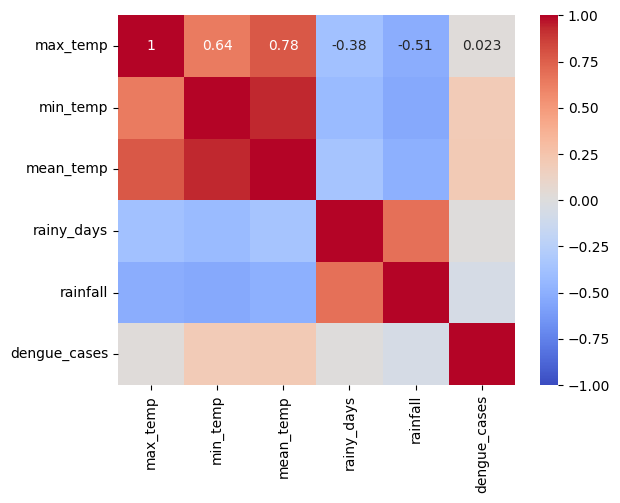

In [15]:
# Look at the multicolinearity on the variables
sns.heatmap(total_df.drop(columns='month').corr(), vmin=-1, vmax=1, cmap='coolwarm', annot=True);

The mean_temp is correlated with max_temp (0.78) and min_temp (0.94) while rainfall is correlated with rainy_days (0.68). As such, further evaluation will be using mean_temp and rainfall vs dengue

In [16]:
total_df = total_df.drop(columns = ['max_temp', 'min_temp', 'rainy_days'])
total_df.head()

,month,mean_temp,rainfall,dengue_cases
0,2012-01-01,26.7,106.1,338
1,2012-02-01,27.2,83.6,258
2,2012-03-01,27.0,313.4,231
3,2012-04-01,27.6,260.6,363
4,2012-05-01,28.2,292.0,338


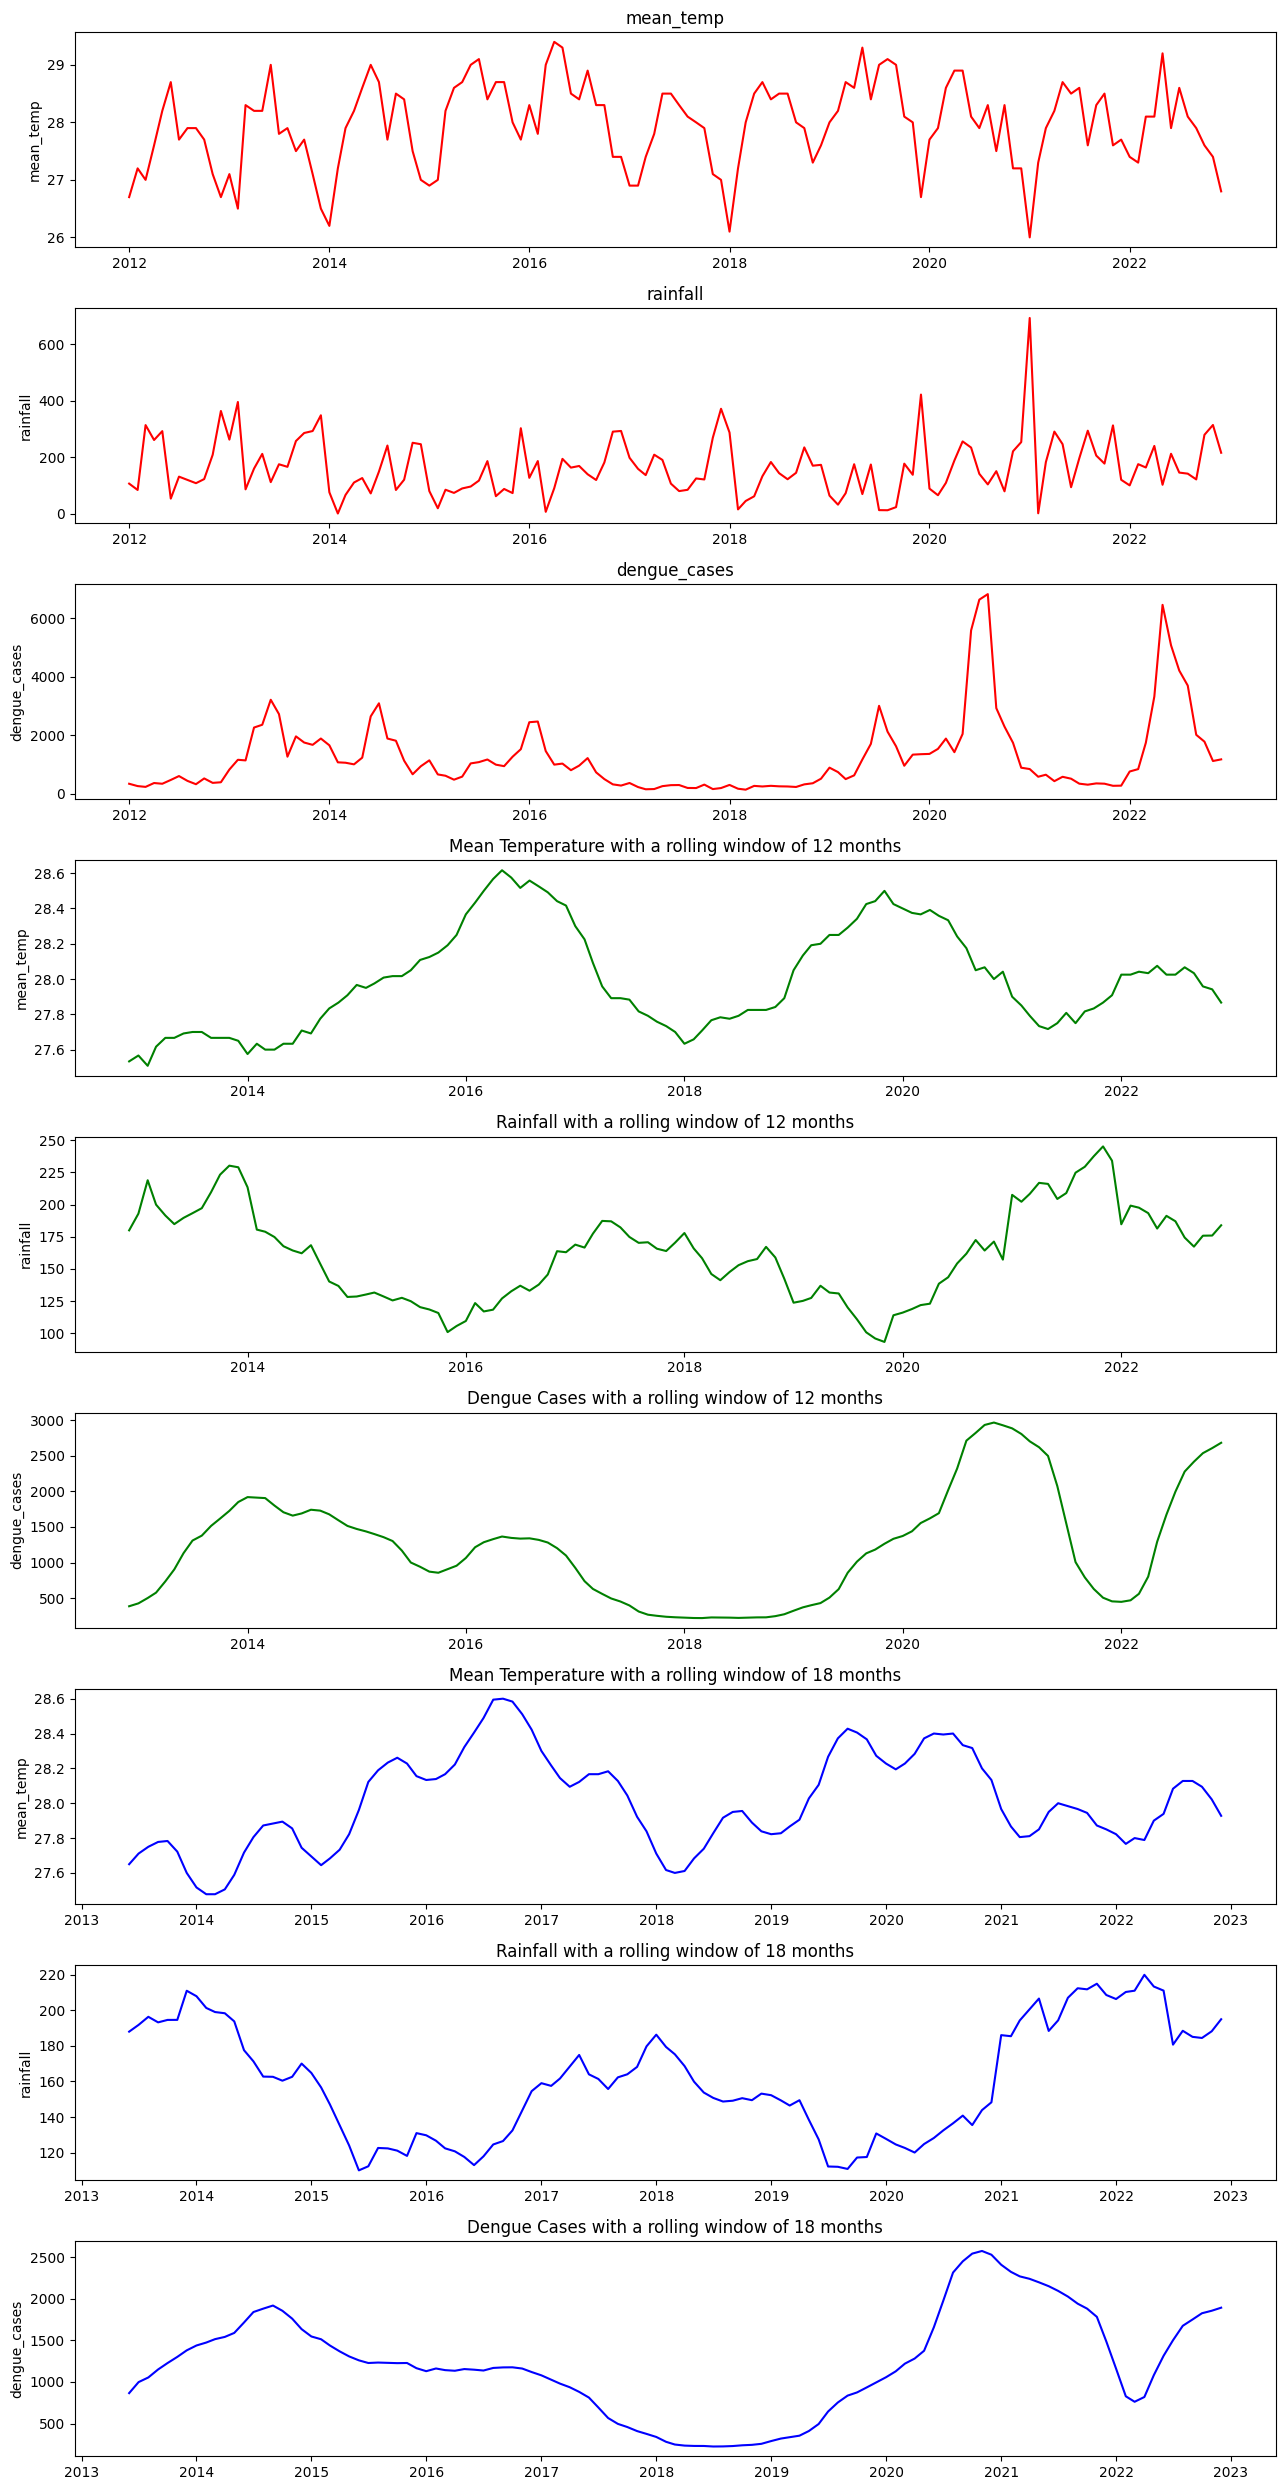

In [17]:
fig, axes = plt.subplots(nrows=9, figsize=(13, 25))
plots = ['mean_temp', 'rainfall', 'dengue_cases']
windows = [0,12,18]
titles = ['Mean Temperature with a rolling window of', 'Rainfall with a rolling window of', 'Dengue Cases with a rolling window of']
colors = ['red', 'green', 'blue']

ax_index = 0
for count, window in enumerate(windows):
    for index, plot in enumerate(plots):
        if window == 0:
            axes[ax_index].plot(total_df['month'], total_df[plot], label=plot, color=colors[count])
            axes[ax_index].set_title(plot)
            axes[ax_index].set_ylabel(plot)
        else:
            axes[ax_index].plot(total_df['month'], total_df[plot].rolling(window).mean(), label=f'Rolling_{window} months', color=colors[count])
            axes[ax_index].set_title(f"{titles[index]} {window} months")
            axes[ax_index].set_ylabel(plot)
        ax_index +=1

fig.tight_layout()

Under optimal conditions, the egg of an Aedes mosquito can hatch into a larva in less than a day. The larva then takes about four days to develop into a pupa, from which an adult mosquito will emerge after two days. Three days after the mosquito has bitten a person and taken in blood, it will lay eggs, and the cycle repeats. This shows that the development from egg to an adult mosquito is less than a week. 

However, there is a research paper published in 2012 that discovers that mean temperature and rainfall precede risks of increasing dengue cases by 1 to 5 months with higher risks being evident at 3–4 months. As such, to test the hypothesis, we will be adding the dengue lead cases from 1 to 4 months and evaluate the correlation to the mean_temp and rainfall


In [18]:
total_df['dengue_lead_1'] = total_df['dengue_cases'].shift(-1)
total_df['dengue_lead_2'] = total_df['dengue_cases'].shift(-2)
total_df['dengue_lead_3'] = total_df['dengue_cases'].shift(-3)
total_df['dengue_lead_4'] = total_df['dengue_cases'].shift(-4)
total_df.head(3)

,month,mean_temp,rainfall,dengue_cases,dengue_lead_1,dengue_lead_2,dengue_lead_3,dengue_lead_4
0,2012-01-01,26.7,106.1,338,258.0,231.0,363.0,338.0
1,2012-02-01,27.2,83.6,258,231.0,363.0,338.0,468.0
2,2012-03-01,27.0,313.4,231,363.0,338.0,468.0,601.0


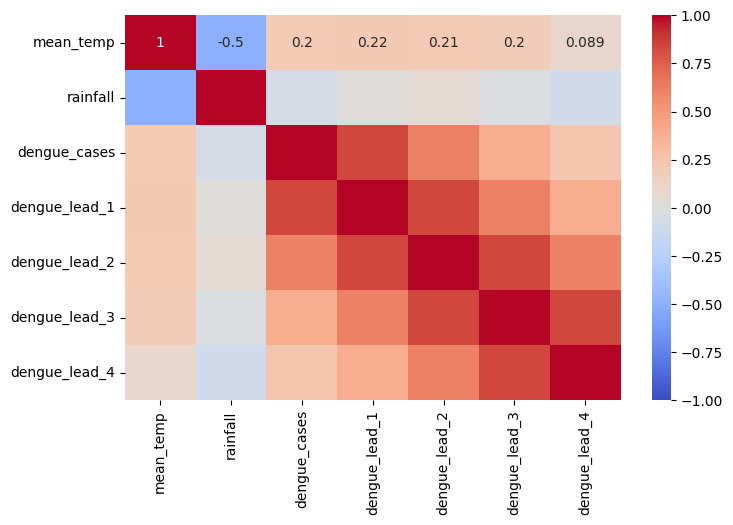

In [19]:
plt.figure(figsize=(8,5))
sns.heatmap(total_df.drop(columns='month').corr(), vmin=-1, vmax=1, cmap='coolwarm', annot=True);

To further evaluate, we will apply rolling average on the data and evaluate the correlation

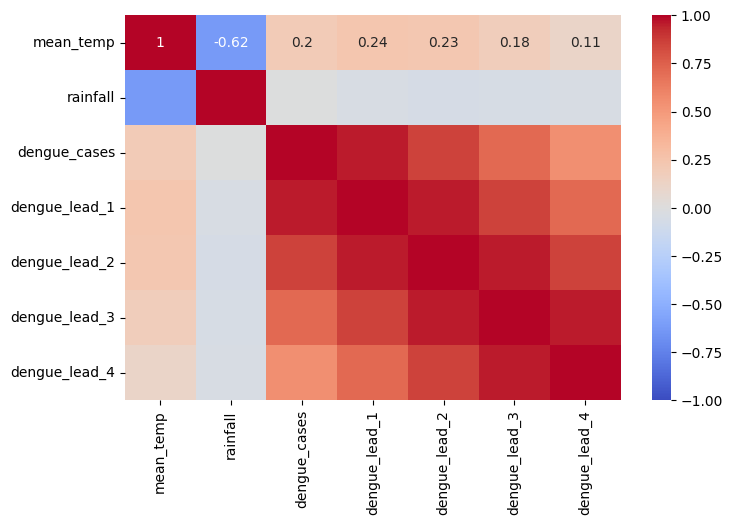

In [20]:
# Heatmap for 6 months rolling average
plt.figure(figsize=(8,5))
sns.heatmap(total_df.drop(columns='month').rolling(6).mean().corr(), vmin=-1, vmax=1, cmap='coolwarm', annot=True);

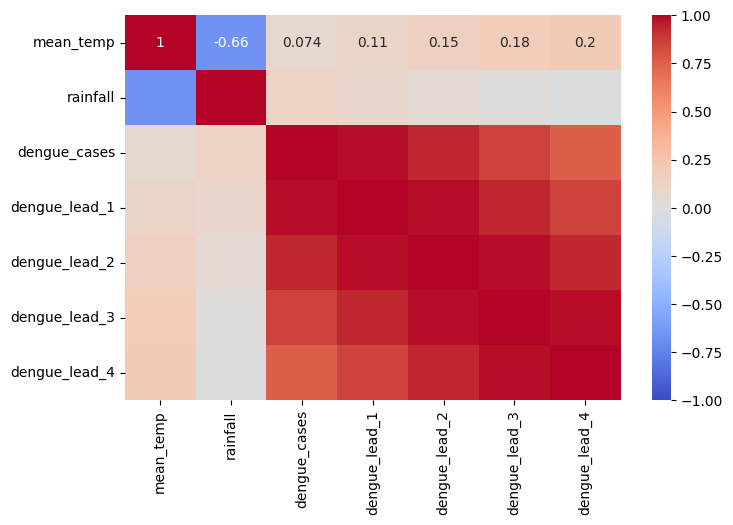

In [21]:
# Heatmap for 12 months rolling average
plt.figure(figsize=(8,5))
sns.heatmap(total_df.drop(columns='month').rolling(12).mean().corr(), vmin=-1, vmax=1, cmap='coolwarm', annot=True);

#### Observations
- The heatmap illustrates that there is weak correlation between dengue cases from 2012 to 2020, with a lead time of up to 4 months, and relevant weather conditions such as the mean_temp and rainfall
- Subsequent analysis using rolling averages similarly indicates a weak correlation between dengue cases and weather conditions

## Google Trend
In this section, we will evaluate the trend of dengue cases with Google Search trends. This analysis will help us evaluate the topics that capture public interest during periods of low or high dengue cases.

In [23]:
# Call out the function for the 3 google trends data

column_mapping_1 = {'dengue: (Singapore)': 'dengue_google', 'Month': 'month'}
dengue_google, dengue_google_shape, dengue_google_missing_values = clean_dataframe('assets/google_trend/dengue_google.csv', 
                                                                                          column_mapping_1, 2)

column_mapping_2 = {'Dengue fever: (Singapore)': 'dengue_fever_google', 'Month': 'month'}
dengue_fever_google, dengue_fever_google_shape, dengue_fever_google_missing_values = clean_dataframe('assets/google_trend/dengue_fever_google.csv', 
                                                                                                            column_mapping_2, 2)

column_mapping_3 = {'dengue cluster: (Singapore)': 'dengue_cluster_google', 'Month': 'month'}
dengue_cluster_google, dengue_cluster_google_shape, dengue_cluster_google_missing_values = clean_dataframe('assets/google_trend/dengue_cluster_google.csv', 
                                                                                                                  column_mapping_3, 2)

In [24]:
print(dengue_google.head(2))
print(dengue_google.tail(2))
print(f"Dengue Google Shape: {dengue_google_shape}, Missing Values: {dengue_google_missing_values}")

       month  dengue_google
0 2012-01-01              9
1 2012-02-01             10
         month  dengue_google
130 2022-11-01             16
131 2022-12-01             17
Dengue Google Shape: (132, 2), Missing Values: False


In [25]:
print(dengue_fever_google.head(2))
print(dengue_fever_google.tail(2))
print(f"Dengue Google Shape: {dengue_fever_google_shape}, Missing Values: {dengue_fever_google_missing_values}")

       month  dengue_fever_google
0 2012-01-01                    9
1 2012-02-01                   10
         month  dengue_fever_google
130 2022-11-01                   15
131 2022-12-01                   16
Dengue Google Shape: (132, 2), Missing Values: False


In [26]:
print(dengue_cluster_google.head(2))
print(dengue_cluster_google.tail(2))
print(f"Dengue Google Shape: {dengue_cluster_google_shape}, Missing Values: {dengue_cluster_google_missing_values}")

       month  dengue_cluster_google
0 2012-01-01                      0
1 2012-02-01                     11
         month  dengue_cluster_google
130 2022-11-01                     17
131 2022-12-01                     22
Dengue Google Shape: (132, 2), Missing Values: False


In [27]:
# Merge data with dengue cases to evaluate the trends
google_trend_1 = pd.merge(dengue_google, dengue_fever_google, 'inner')
google_trend = pd.merge(google_trend_1, dengue_cluster_google, 'inner')
google_trend['dengue_cases'] = dengue_cases.values
google_trend.head()

,month,dengue_google,dengue_fever_google,dengue_cluster_google,dengue_cases
0,2012-01-01,9,9,0,338
1,2012-02-01,10,10,11,258
2,2012-03-01,10,9,0,231
3,2012-04-01,11,10,0,363
4,2012-05-01,11,10,0,338


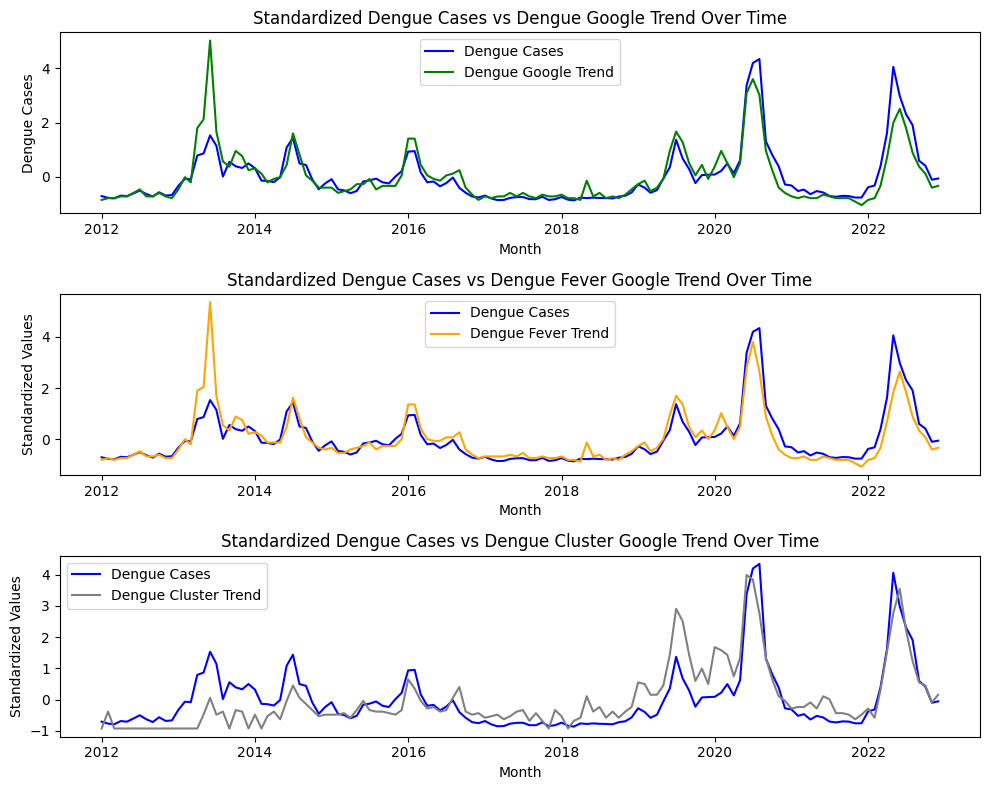

In [28]:
# Plot the actual dengue cases vs dengue google search trend
from sklearn.preprocessing import StandardScaler

# Initiate StandardScaler
sc = StandardScaler()

# Fit and transform both columns
scaled_values = sc.fit_transform(google_trend[['dengue_cases', 'dengue_google', 'dengue_fever_google', 'dengue_cluster_google']])

# Plotting
fig, axes = plt.subplots(nrows=3, figsize=(10, 8))

# Plotting actual Dengue Cases vs Dengue Google Trend
axes[0].plot(google_trend['month'], scaled_values[:, 0], label='Dengue Cases', color='blue')
axes[0].plot(google_trend['month'], scaled_values[:, 1], label='Dengue Google Trend', color='green')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Dengue Cases')
axes[0].set_title('Standardized Dengue Cases vs Dengue Google Trend Over Time')
axes[0].legend()

# Plotting standardized Dengue Cases vs Dengue Fever Trend
axes[1].plot(google_trend['month'], scaled_values[:, 0], label='Dengue Cases', color='blue')
axes[1].plot(google_trend['month'], scaled_values[:, 2], label='Dengue Fever Trend', color='orange')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Standardized Values')
axes[1].set_title('Standardized Dengue Cases vs Dengue Fever Google Trend Over Time')
axes[1].legend()

# Plotting standardized Dengue Cases vs Dengue Cluster Trend
axes[2].plot(google_trend['month'], scaled_values[:, 0], label='Dengue Cases', color='blue')
axes[2].plot(google_trend['month'], scaled_values[:, 3], label='Dengue Cluster Trend', color='grey')
axes[2].set_xlabel('Month')
axes[2].set_ylabel('Standardized Values')
axes[2].set_title('Standardized Dengue Cases vs Dengue Cluster Google Trend Over Time')
axes[2].legend()

plt.tight_layout()
plt.show()

The trend above shows that the dengue related google search exhibit similar trends with the dengue cases, all points being standardized. To evaluate further on the correlation coefficient, we plot the heatmap

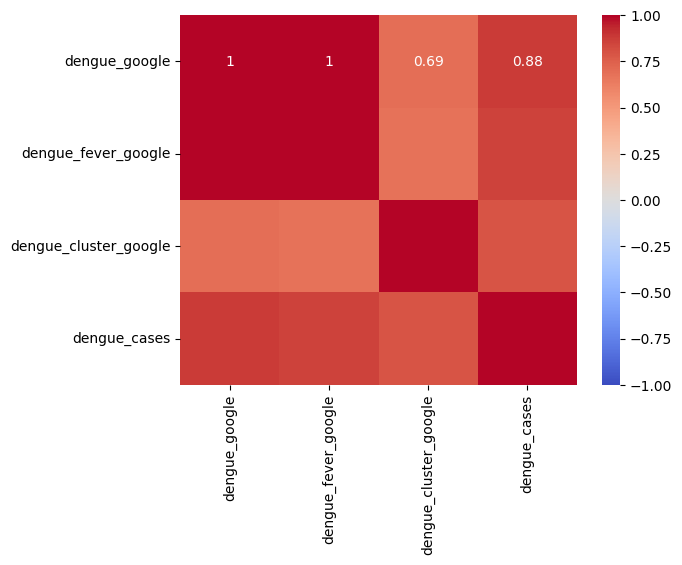

In [29]:
sns.heatmap(google_trend.drop(columns='month').corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm');

The dengue cases exhibit strong correlation with dengue, dengue fever, and dengue cluster google trends

To evaluate further, we will try the time lag correlation on the dengue cases, which will indicate that Google Trends data can potentially be used for an early warning system and novel tool to monitor public reaction before the increase of dengue cases and during the outbreak

In [114]:
# Apply shift to dengue_cases

google_trend['dengue_cases_lead_1'] = google_trend['dengue_cases'].shift(-1)
google_trend['dengue_cases_lead_2'] = google_trend['dengue_cases'].shift(-2)
google_trend['dengue_cases_lead_3'] = google_trend['dengue_cases'].shift(-3)
google_trend.head()

,month,dengue_google,dengue_fever_google,dengue_cluster_google,dengue_cases,dengue_cases_lead_1,dengue_cases_lead_2,dengue_cases_lead_3
0,2012-01-01,9,9,0,338,258.0,231.0,363.0
1,2012-02-01,10,10,11,258,231.0,363.0,338.0
2,2012-03-01,10,9,0,231,363.0,338.0,468.0
3,2012-04-01,11,10,0,363,338.0,468.0,601.0
4,2012-05-01,11,10,0,338,468.0,601.0,436.0


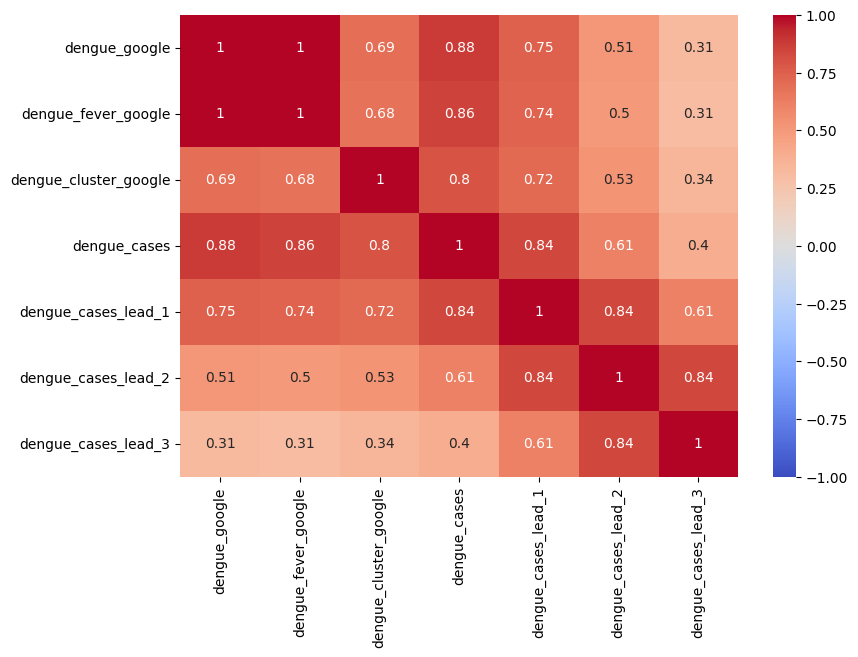

In [118]:
# Evaluate the correlation through heatmap
plt.figure(figsize=(9,6))
sns.heatmap(google_trend.drop(columns='month').corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm');

The dengue cases lead 1 month is showing a strong correlation to the Google Trends data. This proves that Google Trends can potentially be used for an early warning system and novel tool to monitor public reaction before the increase of dengue cases and during the outbreak.

Approaches in utilization of Google Trends for early warning systems and as a monitoring tool for public reaction are intended to assist traditional surveillance systems in order to increase public health response to dengue. Google Trends shall not be utilized to replace the existing surveillance systems but rather to supplement and complement them.